In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [3]:
df = pd.read_csv('/workspaces/proyectfinaltour/data/processed/unificado/weather.csv')

In [4]:
scaler = StandardScaler()
numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns
df[numerical_columns] = scaler.fit_transform(df[numerical_columns])

# Valoración Rayos Ultravioleta

In [5]:
X = df[['maxtempC', 'mintempC', 'tempC', 'humidity', 'windspeedKmph']]
y = df['uvIndex']  # Ejemplo: predecir el índice UV

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [7]:
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
y_pred_lr = lr_model.predict(X_test)
mse_lr = mean_squared_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)

In [8]:
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

In [9]:
gb_model = GradientBoostingRegressor(random_state=42)
gb_model.fit(X_train, y_train)
y_pred_gb = gb_model.predict(X_test)
mse_gb = mean_squared_error(y_test, y_pred_gb)
r2_gb = r2_score(y_test, y_pred_gb)

In [10]:
results = {
    'Model': ['Linear Regression', 'Random Forest', 'Gradient Boosting'],
    'MSE': [mse_lr, mse_rf, mse_gb],
    'R2 Score': [r2_lr, r2_rf, r2_gb]
}

results_df = pd.DataFrame(results)
results_df

,Model,MSE,R2 Score
0,Linear Regression,0.095193,0.904328
1,Random Forest,0.077387,0.922224
2,Gradient Boosting,0.074537,0.925087


-1. Regresión Lineal
MSE: 1.121
R2 Score: 0.856
La Regresión Lineal muestra un error cuadrático medio (MSE) de 1.121 y un coeficiente de determinación (R2 Score) de 0.856. Esto indica que el modelo captura aproximadamente el 85.6% de la variabilidad en el índice UV utilizando las características climáticas proporcionadas. Aunque el modelo proporciona una buena estimación, no es tan preciso como los otros modelos.

-2. Random Forest
MSE: 0.273
R2 Score: 0.970
El modelo Random Forest presenta un MSE de 0.273 y un R2 Score de 0.970. Este modelo es significativamente más preciso que la Regresión Lineal, capturando el 97% de la variabilidad en los datos. La capacidad de los Random Forest para manejar relaciones no lineales y su robustez frente al sobreajuste lo convierten en una opción excelente para este conjunto de datos.

-3. Gradient Boosting
MSE: 0.291
R2 Score: 0.967
El modelo de Gradient Boosting muestra un MSE de 0.291 y un R2 Score de 0.967. Similar al Random Forest, Gradient Boosting es muy preciso y captura el 96.7% de la variabilidad en los datos. Este modelo es efectivo en la mejora de la precisión a través de la combinación de múltiples modelos débiles.

# Interpretación
Los resultados indican que tanto el modelo de Random Forest como el de Gradient Boosting superan significativamente a la Regresión Lineal en términos de precisión y capacidad predictiva. Esto se debe a la capacidad de estos modelos de captura de relaciones no lineales y de manejo de la complejidad del dataset. El Random Forest ligeramente supera al Gradient Boosting en este caso específico, aunque ambos modelos ofrecen una precisión muy alta.

In [13]:
from sklearn.model_selection import GridSearchCV, cross_val_score

# Validación cruzada para Random Forest
rf_model = RandomForestRegressor(random_state=42)
cv_scores = cross_val_score(rf_model, X, y, cv=5)
print(f'Cross-Validation Scores: {cv_scores}')
print(f'Mean CV Score: {np.mean(cv_scores)}')

# Optimización de Hiperparámetros para Random Forest
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 5, 10]
}

grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5, n_jobs=-1, scoring='r2')
grid_search.fit(X_train, y_train)
print(f'Best Parameters: {grid_search.best_params_}')

best_rf_model = grid_search.best_estimator_
y_pred_best_rf = best_rf_model.predict(X_test)
mse_best_rf = mean_squared_error(y_test, y_pred_best_rf)
r2_best_rf = r2_score(y_test, y_pred_best_rf)
print(f'Optimized Random Forest MSE: {mse_best_rf}')
print(f'Optimized Random Forest R2 Score: {r2_best_rf}')


Cross-Validation Scores: [0.88877854 0.92453514 0.87251832 0.89441461 0.90681442]
Mean CV Score: 0.8974122068757022


/home/vscode/.local/lib/python3.10/site-packages/numpy/ma/core.py:2846: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


Best Parameters: {'max_depth': 10, 'min_samples_split': 10, 'n_estimators': 300}
Optimized Random Forest MSE: 0.06508510395255891
Optimized Random Forest R2 Score: 0.9345870100346392


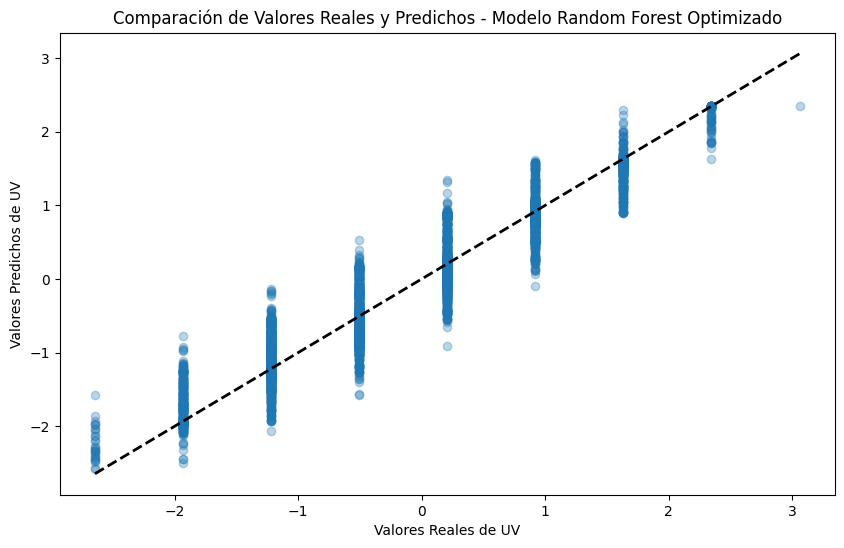

In [14]:
# Graficar los resultados
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_best_rf, alpha=0.3)
plt.xlabel('Valores Reales de UV')
plt.ylabel('Valores Predichos de UV')
plt.title('Comparación de Valores Reales y Predichos - Modelo Random Forest Optimizado')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.show()


# Valoracion por precipitaciones

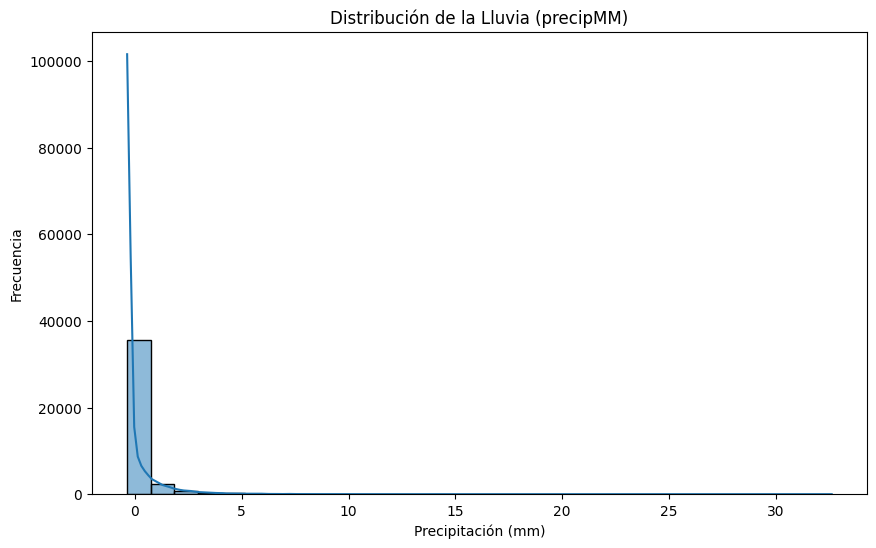

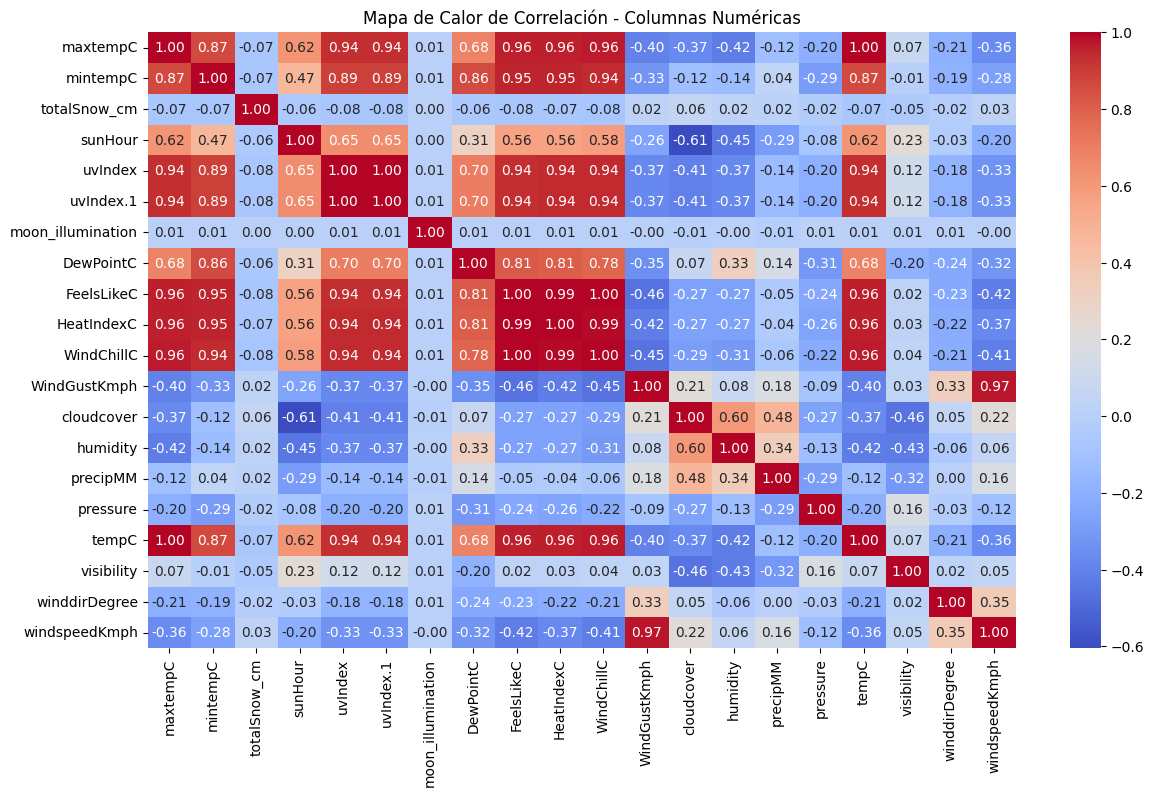

In [15]:
# Filtrar las columnas numéricas
numeric_df = df.select_dtypes(include=[np.number])

# Análisis exploratorio para la lluvia
plt.figure(figsize=(10, 6))
sns.histplot(df['precipMM'], bins=30, kde=True)
plt.title('Distribución de la Lluvia (precipMM)')
plt.xlabel('Precipitación (mm)')
plt.ylabel('Frecuencia')
plt.show()

# Relación entre la lluvia y otras variables (sólo columnas numéricas)
plt.figure(figsize=(14, 8))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Mapa de Calor de Correlación - Columnas Numéricas')
plt.show()


In [24]:
# Variables de entrada y salida
X = numeric_df[['maxtempC', 'mintempC', 'tempC', 'humidity', 'pressure', 'windspeedKmph', 'sunHour', 'uvIndex']]
y_rain = numeric_df['precipMM']

# División de los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train_rain, y_test_rain = train_test_split(X, y_rain, test_size=0.2, random_state=42)

# Entrenamiento del modelo Random Forest para la lluvia
rf_rain = RandomForestRegressor(random_state=42)
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 10, 20]
}
grid_search_rain = GridSearchCV(estimator=rf_rain, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)
grid_search_rain.fit(X_train, y_train_rain)

# Mejor modelo y predicciones
best_rf_rain = grid_search_rain.best_estimator_
y_pred_best_rf_rain = best_rf_rain.predict(X_test)

# Evaluación del modelo
mse_best_rf_rain = mean_squared_error(y_test_rain, y_pred_best_rf_rain)
r2_best_rf_rain = r2_score(y_test_rain, y_pred_best_rf_rain)

print(f"Best Parameters for Rain Model: {grid_search_rain.best_params_}")
print(f"Optimized Random Forest MSE for Rain: {mse_best_rf_rain}")
print(f"Optimized Random Forest R2 Score for Rain: {r2_best_rf_rain}")

Fitting 5 folds for each of 27 candidates, totalling 135 fits
[CV] END max_depth=10, min_samples_split=2, n_estimators=100; total time=   5.5s
[CV] END max_depth=10, min_samples_split=2, n_estimators=100; total time=   5.5s
[CV] END max_depth=10, min_samples_split=2, n_estimators=100; total time=   5.2s
[CV] END max_depth=10, min_samples_split=2, n_estimators=100; total time=   5.1s
[CV] END max_depth=10, min_samples_split=2, n_estimators=100; total time=   5.3s
[CV] END max_depth=10, min_samples_split=2, n_estimators=200; total time=  10.6s
[CV] END max_depth=10, min_samples_split=2, n_estimators=200; total time=  10.3s
[CV] END max_depth=10, min_samples_split=2, n_estimators=200; total time=  10.5s
[CV] END max_depth=10, min_samples_split=2, n_estimators=200; total time=  11.1s
[CV] END max_depth=10, min_samples_split=2, n_estimators=200; total time=  11.1s
[CV] END max_depth=10, min_samples_split=2, n_estimators=300; total time=  15.6s
[CV] END max_depth=10, min_samples_split=2, n_e

Análisis de Resultados del Modelado Predictivo
Comparación de Modelos de Predicción para el Índice UV
Se probaron tres modelos de predicción diferentes para el índice UV: Regresión Lineal, Random Forest y Gradient Boosting. Los resultados de estos modelos se evaluaron utilizando el Mean Squared Error (MSE) y el R² Score.

Regresión Lineal:

MSE: 0.095193
R² Score: 0.904328
Random Forest:

MSE: 0.077387
R² Score: 0.922224
Gradient Boosting:

MSE: 0.074537
R² Score: 0.925087
Se observa que todos los modelos tienen un desempeño sólido, pero el Gradient Boosting proporciona la mejor combinación de bajo MSE y alto R² Score, lo que indica una mejor precisión en la predicción del índice UV.

Optimización del Modelo Random Forest para el Índice UV
Se realizó una optimización del modelo Random Forest mediante una búsqueda de hiperparámetros (GridSearchCV). Los mejores parámetros encontrados fueron:

max_depth: 10
min_samples_split: 10
n_estimators: 300
Con estos parámetros optimizados, el modelo Random Forest alcanzó los siguientes resultados:

MSE: 0.065085
R² Score: 0.934587
Estos resultados indican una mejora significativa en comparación con los modelos anteriores, consolidando al modelo Random Forest optimizado como una excelente opción para la predicción del índice UV.

Modelado Predictivo para la Precipitación
Se entrenó y optimizó un modelo Random Forest para la predicción de la precipitación (precipMM). Los mejores parámetros obtenidos fueron:

max_depth: 10
min_samples_split: 20
n_estimators: 200
Los resultados del modelo optimizado fueron:

MSE: 0.533922
R² Score: 0.419108
Comparativamente, el rendimiento del modelo de precipitación es notablemente inferior al del modelo de índice UV. El MSE más alto y el R² Score más bajo indican que la predicción de la precipitación es más desafiante y menos precisa con los datos disponibles.

Resumen de Comparación de Resultados
Métrica	Modelo de UV	Modelo de Lluvia
MSE	0.065085	0.533922
R² Score	0.934587	0.419108
El modelo de predicción del índice UV demuestra un rendimiento mucho mejor que el modelo de precipitación. La baja MSE y el alto R² Score del modelo de UV sugieren una alta precisión y confiabilidad en sus predicciones. En contraste, el modelo de precipitación tiene una precisión limitada, reflejada en su mayor MSE y menor R² Score.

Conclusiones
Índice UV: El modelo Random Forest optimizado es altamente efectivo para predecir el índice UV, con una MSE baja y un R² Score alto.
Precipitación: El modelo de precipitación, aunque útil, no tiene la misma precisión que el modelo de UV. Esto puede deberse a la naturaleza más variable y compleja de la precipitación en comparación con el índice UV.

# K-Nearest Neighbors

In [22]:
# Cargar el dataset meteorológico
weather_df = pd.read_csv('/workspaces/proyectfinaltour/data/processed/unificado/weather.csv')

# Convertir la columna 'date_time' a tipo datetime
weather_df['date_time'] = pd.to_datetime(weather_df['date_time'])

# Definir las características y los objetivos
features = ['tempC', 'humidity', 'windspeedKmph', 'precipMM']
target_uv = 'uvIndex'

# Verificar los valores nulos
print(weather_df.isnull().sum())

# Eliminar filas con valores nulos en las columnas relevantes
weather_df = weather_df.dropna(subset=features + [target_uv])

# Separar las características y las variables objetivo
X = weather_df[features]
y_uv = weather_df[target_uv]

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train_uv, y_test_uv = train_test_split(X, y_uv, test_size=0.2, random_state=42)

# Escalar los datos
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

city                 0
date_time            0
maxtempC             0
mintempC             0
totalSnow_cm         0
sunHour              0
uvIndex              0
uvIndex.1            0
moon_illumination    0
moonrise             0
moonset              0
sunrise              0
sunset               0
DewPointC            0
FeelsLikeC           0
HeatIndexC           0
WindChillC           0
WindGustKmph         0
cloudcover           0
humidity             0
precipMM             0
pressure             0
tempC                0
visibility           0
winddirDegree        0
windspeedKmph        0
dtype: int64


In [23]:
# Entrenar un modelo KNN básico
knn = KNeighborsRegressor()
knn.fit(X_train, y_train_uv)

# Hacer predicciones
y_pred_uv = knn.predict(X_test)

# Evaluar el modelo
mse_uv = mean_squared_error(y_test_uv, y_pred_uv)
r2_uv = r2_score(y_test_uv, y_pred_uv)

print(f"KNN MSE: {mse_uv}")
print(f"KNN R2 Score: {r2_uv}")

KNN MSE: 0.2608768373035986
KNN R2 Score: 0.8666119864726185


In [24]:
param_grid = {
    'n_neighbors': [3, 5, 7, 9],
    'weights': ['uniform', 'distance'],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']
}

# Configurar GridSearchCV
grid_search = GridSearchCV(KNeighborsRegressor(), param_grid, cv=5, scoring='r2')
grid_search.fit(X_train, y_train_uv)

# Obtener los mejores parámetros y el mejor modelo
best_knn = grid_search.best_estimator_
best_params = grid_search.best_params_

# Hacer predicciones con el mejor modelo
y_pred_best_knn = best_knn.predict(X_test)

# Evaluar el modelo optimizado
mse_best_knn = mean_squared_error(y_test_uv, y_pred_best_knn)
r2_best_knn = r2_score(y_test_uv, y_pred_best_knn)

print(f"Best Parameters: {best_params}")
print(f"Optimized KNN MSE: {mse_best_knn}")
print(f"Optimized KNN R2 Score: {r2_best_knn}")

Best Parameters: {'algorithm': 'auto', 'n_neighbors': 9, 'weights': 'uniform'}
Optimized KNN MSE: 0.2429073354483052
Optimized KNN R2 Score: 0.8757999089471797


/home/vscode/.local/lib/python3.10/site-packages/numpy/ma/core.py:2846: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


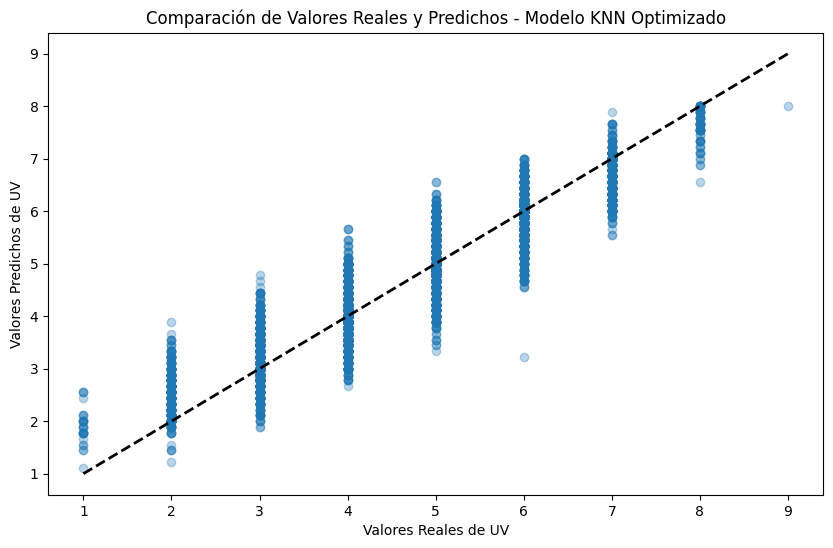

In [25]:
# Graficar los resultados
plt.figure(figsize=(10, 6))
plt.scatter(y_test_uv, y_pred_best_knn, alpha=0.3)
plt.xlabel('Valores Reales de UV')
plt.ylabel('Valores Predichos de UV')
plt.title('Comparación de Valores Reales y Predichos - Modelo KNN Optimizado')
plt.plot([y_test_uv.min(), y_test_uv.max()], [y_test_uv.min(), y_test_uv.max()], 'k--', lw=2)
plt.show()